In [1]:
%matplotlib notebook

from matplotlib import cm, scale, pyplot as plt
import ipywidgets as widgets
import numpy as np
from pathlib import Path
from combine.quick_g import widget_g_plot

In [2]:
def widget_g_plot_overlaid(gs, phi=0):
    fig, ax = plt.subplots(figsize=(9.5,8))
    ax.set_aspect("equal")
    
    def g_plot_overlaid(phi):
        ax.clear()
        for i, g in enumerate(gs):
            R, z, _ = np.transpose(g[:,:,phi,:], (2,0,1))
            ax.plot(R,z, c=f"C{i}", lw=0.3, zorder=101)
            ax.plot(R.T,z.T, c=f"C{i}", lw=0.3, zorder=102)
        fig.tight_layout()
    
    phi = widgets.IntSlider(min=0, max=gs[0].shape[2]-1, value=phi, step=1)
    widgets.interact(g_plot_overlaid, phi = phi)

In [3]:
grid_object = "EIM-ErrFullT-2022-05-11T12:36:28"  # "EIM-2022-05-09T16:37:23"
basepath = Path(f"/u/phg/grid/tracer/W7X/EMC3compliance/{grid_object}/")

In [4]:
gs = []
for i, module_path in enumerate(sorted(basepath.iterdir())):
    module = np.load(module_path / "grid.npz")["data"]
    gs.append(module)

In [5]:
len(gs)

5

<IPython.core.display.Javascript object>


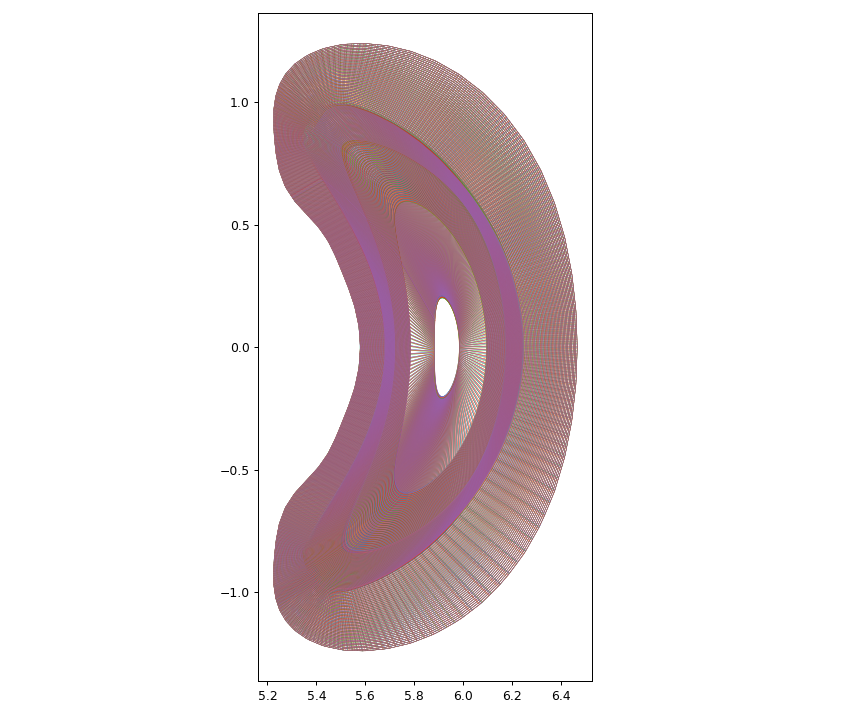

interactive(children=(IntSlider(value=0, description='phi', max=70), Output()), _dom_classes=('widget-interact…

In [6]:
widget_g_plot_overlaid(gs[:], phi=0)

In [7]:
import combine.grid_analyze_version3 as ga

In [8]:
g2 = gs[1]
ret = np.nonzero(np.invert(ga.fast_convex(g2)))
_ = np.array([*ret]).T
_

array([], shape=(0, 3), dtype=int64)

In [9]:
errors = []
for i in range(5):
    ret = np.nonzero(np.invert(ga.fast_convex(gs[i])))
    errors_i = np.array([*ret]).T
    errors.append(errors_i)
    print(errors_i)

[]
[]
[]
[]
[]


<IPython.core.display.Javascript object>


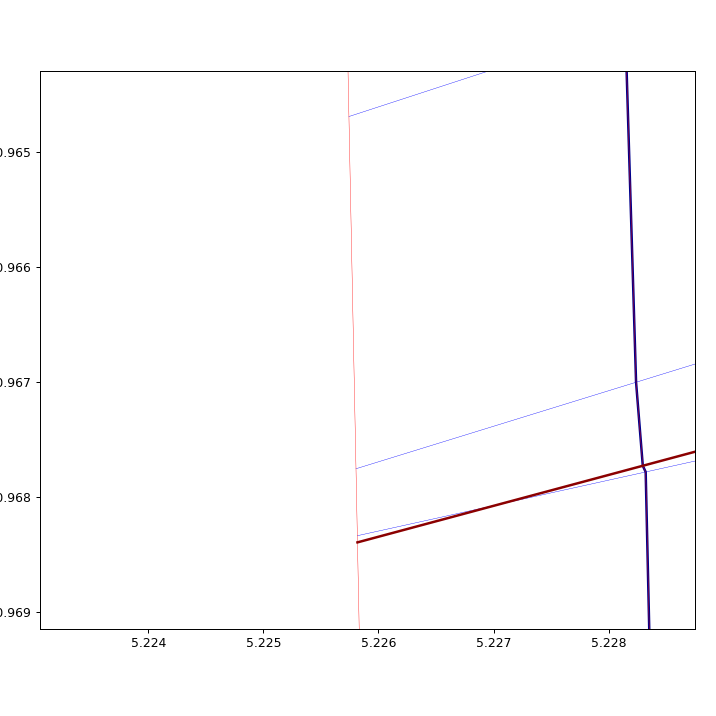

interactive(children=(IntSlider(value=0, description='phi', max=70), Output()), _dom_classes=('widget-interact…

In [8]:
widget_g_plot(gs[4], phi=0, Ri=108, THTi=87)

<IPython.core.display.Javascript object>


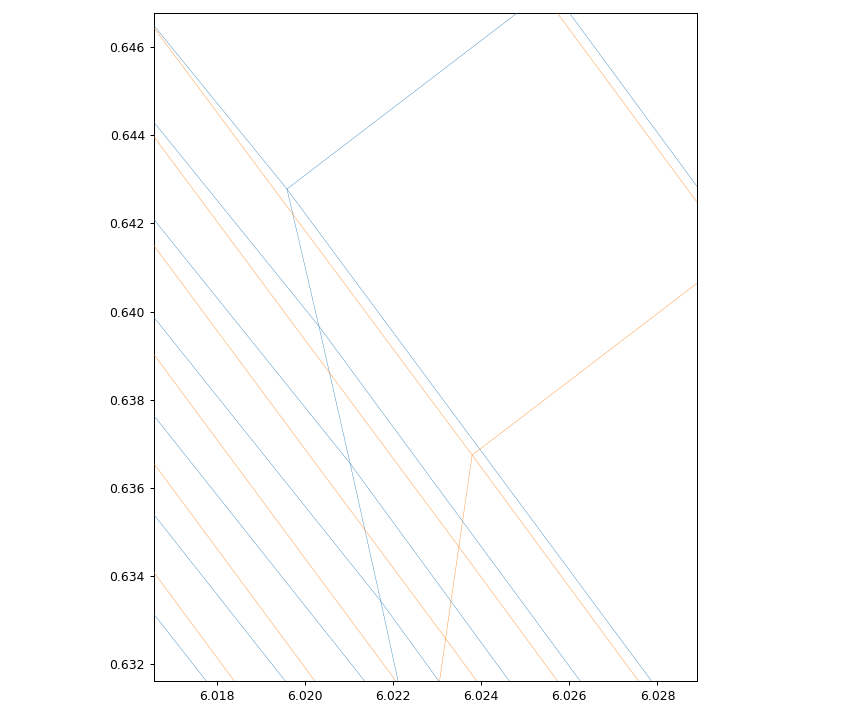

In [26]:
g1, g2 = gs[0], gs[1]

fig, ax = plt.subplots(figsize=(9.5,8))
ax.set_aspect("equal")
ax.clear()

R, z, _ = np.transpose(g1[:,:,-1,:], (2,0,1))
ax.plot(R,z, c=f"C0", lw=0.3, zorder=101)
ax.plot(R.T,z.T, c=f"C0", lw=0.3, zorder=102)

R, z, _ = np.transpose(g2[:,:,0,:], (2,0,1))
ax.plot(R,z, c=f"C1", lw=0.3, zorder=101)
ax.plot(R.T,z.T, c=f"C1", lw=0.3, zorder=102)

fig.tight_layout()
